In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap


In [2]:
# Load the Iris dataset
data = load_iris()
X = data.data[:, :2]  # Select only the first two features
y = data.target
class_names = data.target_names


In [3]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
# Train a Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [5]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Accuracy: 82.22%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.78      0.54      0.64        13
   virginica       0.65      0.85      0.73        13

    accuracy                           0.82        45
   macro avg       0.81      0.79      0.79        45
weighted avg       0.83      0.82      0.82        45



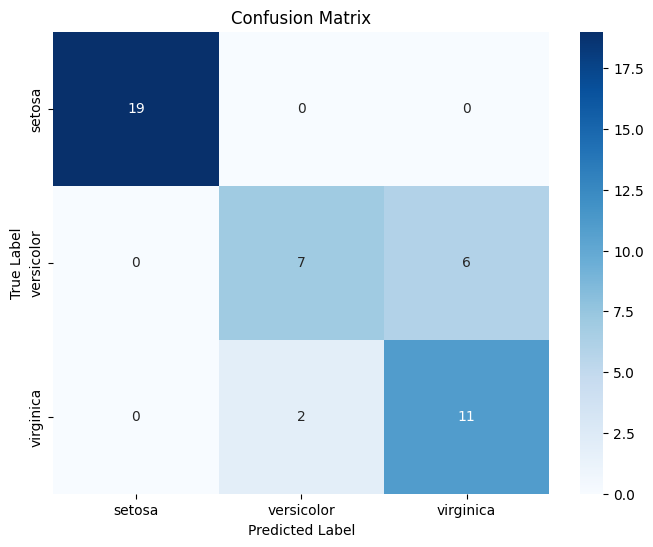

In [6]:
# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

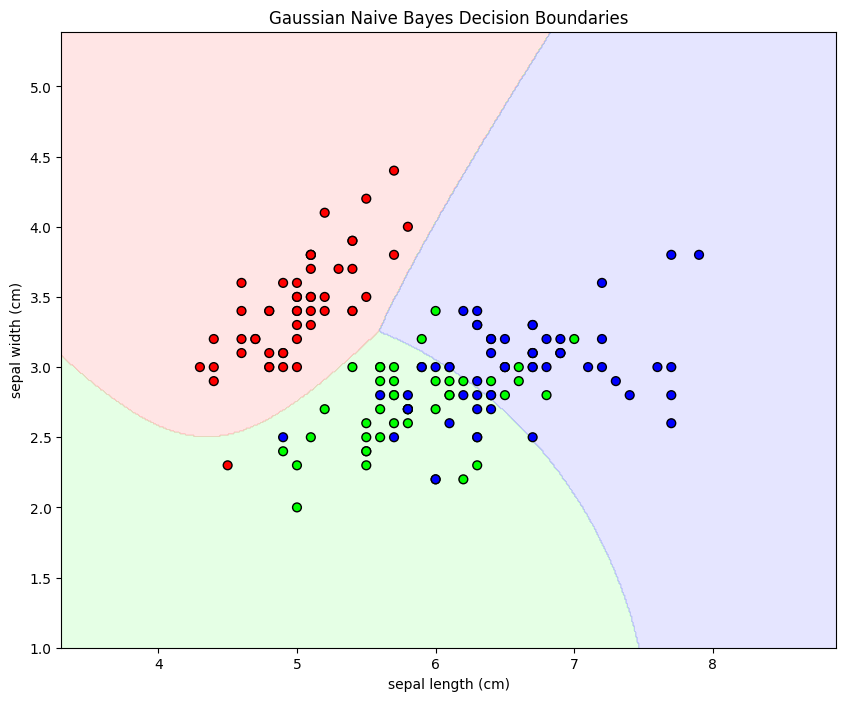

In [9]:
# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))

    # Predict class labels for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create a color plot with the results
    plt.figure(figsize=(10, 8))
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['#FF0000', '#00FF00', '#0000FF']
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    
    # Plot the training and test points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=40)
    plt.xlabel(data.feature_names[0])
    plt.ylabel(data.feature_names[1])
    plt.title("Gaussian Naive Bayes Decision Boundaries")
    plt.legend(handles=scatter.legend_elements()[0], labels=class_names)
    plt.show()

# Call the function to plot decision boundaries
plot_decision_boundaries(X, y, model)
